In [2]:
import logging
import os
import sys
from pathlib import Path

import click
from dotenv import find_dotenv, load_dotenv
import pandas as pd
import time
import requests
from tqdm import tqdm

In [3]:
input_filepath = "../data/raw/BM_csv_files/3000BC-AD500/"


csv_files = os.listdir(input_filepath)
regions = ["north_america", "asia", "europe", "africa", "south_america"]
all_dfs = {}
for region in regions:
    region_csv_files = [file for file in csv_files if region in file.lower()]
    region_df = pd.concat(
        [pd.read_csv(os.path.join(input_filepath, file)) for file in region_csv_files]
    )
    region_df.drop_duplicates(inplace=True, ignore_index=True)
    all_dfs[region] = region_df

# create a master df with a new column for the region
world_df = pd.DataFrame()
for region, df in all_dfs.items():
    df["region"] = region
    world_df = pd.concat([world_df, df])

world_df.drop_duplicates(subset=world_df.columns.difference(["region"]), inplace=True)

In [4]:
world_df

Image            Object type  \
0    https://media.britishmuseum.org/media/Reposito...                   adze   
1    https://media.britishmuseum.org/media/Reposito...                  altar   
2    https://media.britishmuseum.org/media/Reposito...                  altar   
3    https://media.britishmuseum.org/media/Reposito...        amulet; pendant   
4    https://media.britishmuseum.org/media/Reposito...           arrow; point   
..                                                 ...                    ...   
719  https://media.britishmuseum.org/media/Reposito...      whistle; figurine   
720  https://media.britishmuseum.org/media/Reposito...                whistle   
721  https://media.britishmuseum.org/media/Reposito...                whistle   
722  https://media.britishmuseum.org/media/Reposito...                whistle   
723  https://media.britishmuseum.org/media/Reposito...  whistling vessel; jar   

         Museum number Title Denomination  Escapement  \
0      No: Am1994,09.1   NaN          NaN         NaN   
1         No: Am,S.818   NaN          NaN         NaN   
2         No: Am,S.817   NaN          NaN         NaN   
3          No: Am.9685   NaN          NaN         NaN   
4     No: Am,S.758.a-c   NaN          NaN         NaN   
..                 ...   ...          ...         ...   
719  No: Am1954,05.196   NaN          NaN         NaN   
720  No: Am1954,05.669   NaN          NaN         NaN   
721  No: Am1954,05.194   NaN          NaN         NaN   
722        No: Am.6877   NaN          NaN         NaN   
723   No: Am1982,Q.944   NaN          NaN         NaN   

                                           Description Producer name  \
0    Adze? of pecked and ground stone, grooved for ...           NaN   
1    Three fragments of burnt clay that formed part...           NaN   
2    Fragments of an altar or crematory basin made ...           NaN   
3    Chalchihuitl, amulet, pendant made of amazonst...           NaN   
4    Three expanding stem arrow or spear points, ma...           NaN   
..                                                 ...           ...   
719  Anthropomorphic whistle / whistle in the shape...           NaN   
720  Whistle made of pottery, possibly modelled and...           NaN   
721  Anthropomorphic whistle in the shape of the An...           NaN   
722  Ovoid shaped whistle made of tumbaga by lost-w...           NaN   
723  Rectangular spouted jar with bridge and (broke...           NaN   

     School/style State  ...               Acq notes (acq) Acq notes (exc)  \
0             NaN   NaN  ...                           NaN             NaN   
1             NaN   NaN  ...                           NaN             NaN   
2             NaN   NaN  ...                           NaN             NaN   
3             NaN   NaN  ...                           NaN             NaN   
4             NaN   NaN  ...                           NaN             NaN   
..            ...   ...  ...                           ...             ...   
719           NaN   NaN  ...                           NaN             NaN   
720           NaN   NaN  ...                           NaN             NaN   
721           NaN   NaN  ...                           NaN             NaN   
722           NaN   NaN  ...                           NaN             NaN   
723           NaN   NaN  ...  Acquisition details unknown.             NaN   

                                 Dept BM/Big number     Reg number  \
0    Africa, Oceania and the Americas           NaN    Am1994,09.1   
1    Africa, Oceania and the Americas           NaN       Am,S.818   
2    Africa, Oceania and the Americas           NaN       Am,S.817   
3    Africa, Oceania and the Americas           NaN        Am.9685   
4    Africa, Oceania and the Americas           NaN   Am,S.758.a-c   
..                                ...           ...            ...   
719  Africa, Oceania and the Americas           NaN  Am1954,05.196   
720  Africa, Oceania and the 

## Null values

In [5]:
null_percentage = (world_df.isnull().sum() / len(world_df)) * 100
desc_df = pd.DataFrame(
    {"Column": null_percentage.index, "Null Percentage": null_percentage.values}
)
desc_df["Null Percentage"] = desc_df["Null Percentage"].round(2)
desc_df["Non-Null Count"] = world_df.count().values
desc_df["unique_values"] = world_df.nunique().values
desc_df["Non-Null Count"] = world_df.count().values
desc_df = desc_df.sort_values(by="Non-Null Count", ascending=False)
desc_df

Column  Null Percentage  Non-Null Count  unique_values
0                    Image             0.00          205721         202525
6              Description             0.00          205721         107102
40                    Dept             0.00          205721              9
25                Location             0.00          205721           1403
14         Production date             0.00          205721          12766
47                  region             0.00          205721              5
2            Museum number             0.00          205721         196970
1              Object type             0.00          205718           4199
17               Materials             0.05          205612           1856
42              Reg number             3.86          197787         196674
13                 Culture             4.18          197125           1738
21              Dimensions             4.52          196413         115526
15        Production place            17.44          169853           3494
37                Acq date            20.69          163156            566
24          Bib references            21.67          161134          13399
33          Acq name (acq)            29.95          144108           5215
28                Subjects            44.44          114308           6779
16               Find spot            47.62          107754           7860
10               Authority            49.92          103030           1541
22             Inscription            53.73           95178          47979
29              Assoc name            54.57           93456           9520
4             Denomination            57.39           87657            636
9                    State            62.18           77802             50
20               Technique            70.98           59695           4003
23       Curators Comments            74.30           52865          33459
44                  Cat no            78.42           44389          44280
43                 Add ids            84.81           31245          26824
38         Acq notes (acq)            86.98           26782           5853
36     Acq name (previous)            89.06           22497           1501
39         Acq notes (exc)            90.70           19132           1450
27               Condition            93.39           13590           5438
19             Type series            94.52           11271           3001
18                    Ware            94.60           11116            351
41           BM/Big number            95.86            8526           8474
26      Exhibition history            95.87            8504           3688
34      Acq name (finding)            96.75            6689            108
7            Producer name            98.25            3596           1447
30             Assoc place            98.72            2638            492
3                    Title            99.00            2063            313
31            Assoc events            99.88             244            113
32            Assoc titles            99.96              89             38
11   Ethnic name (made by)            99.98              32             18
12     Ethnic name (assoc)           100.00               8              4
45  Banknote serial number           100.00               1              1
35    Acq name (excavator)           100.00               0              0
8             School/style           100.00               0              0
46          Joined objects           100.00               0              0
5               Escapement           100.00               0              0

There could be some interesting information in the more sparsely populated columns, for example the `Inscription` column could result in a cool OCR task, but we have to draw the line somewhere, hence I will drop all columns with more than 50% null values.

In [6]:
threshold = len(world_df) * 0.5
world_df.dropna(thresh=threshold, axis=1, inplace=True)

## Analysing each column

```python
for column in world_df.columns:
    try:
        non_null_examples = world_df[column].dropna().sample(10)
        print(
            f"Column: {column}, Non-null count: {desc_df[desc_df['Column'] == column]['Non-Null Count'].values[0]}, Unique values: {desc_df[desc_df['Column'] == column]['unique_values'].values[0]}"
        )
        print(non_null_examples.values)
    except:
        print(f"Column: {column}")
        print("No non-null examples found")
```


### Column: Image, Non-null count: 205721, Unique values: 202525
```
['https://media.britishmuseum.org/media/Repository/Documents/2014_10/11_10/6acbde4c_52c8_482b_a420_a3c100ae572e/preview_00630152_001.jpg'
...
 'https://media.britishmuseum.org/media/Repository/Documents/2022_1/31_15/b9873170_4632_4d7c_92b4_ae2e00f9efa1/preview_ERC_Cab_118_OFFICIAL_01020.jpg']
 ```

Could be the best option for an index column: **keep**
### Column: Production date, Non-null count: 205721, Unique values: 12766
```
['3rdC-7thC' '253-260' '1700BC-1000BC' '400BC-300BC (?)' '550BC-510BC'
 '3rdC-7thC' '450-457' '190-230 (circa)' '238-244' '5thC BC-4thC BC']
```
I like this as a regression task, but I will have to do some cleaning first: **keep**
### Column: Dept, Non-null count: 205721, Unique values: 9
```
['Britain, Europe and Prehistory' 'Britain, Europe and Prehistory'
 'Middle East' 'Money and Medals' 'Greek and Roman' 'Greek and Roman'
 'Greek and Roman' 'Greek and Roman' 'Greek and Roman' 'Money and Medals']
```
Too broad: **drop**
### Column: Location, Non-null count: 205721, Unique values: 1403
```
['Not on display' 'Not on display' 'Not on display' 'Not on display'
 'Not on display' 'Not on display' 'Not on display' 'Not on display'
 'Not on display' 'Not on display']
```

Useless: **drop**
### Column: region, Non-null count: 205721, Unique values: 5
```
['europe' 'asia' 'europe' 'europe' 'asia' 'asia' 'europe' 'europe' 'asia'
 'asia']
```
The column I added, could be useful for splitting the data into smaller datasets if the world is too big: **keep**
### Column: Description, Non-null count: 205721, Unique values: 107102
```
['Pottery: red-figured squat lekythos.\r\nAphrodite and a young hunter (Adonis?). In the centre, Aphrodite (flesh coloured white) is seated on raised ground to left, with a mantle over her legs, leaning on her left hand; her face and right arm are missing; she wears a radiated fillet, necklace of beads, and bracelets. Confronting her on left is seated a youth in a chlamys and a Phrygian cap, resting his left hand on the end of his club, the head of which rests on the ground beside him; his left elbow is placed in the hollow between the branch and trunk of a tree which springs from the ground on his left. His face, which is broken away, seems to be turned to the front. Behind Aphrodite, Eros flies towards her, and appears to be clasping her round the neck; his face is damaged; he wears a fillet. On the right is a group of two women: one is seated on raised ground, and holds out in her right hand to left a wreath of laurel (part missing), of which her left hand probably held the other end. Behind her stands a woman who rests one hand on either shoulder of the seated figure; her drapery flies back as if she were in quick movement, though her feet are together. On the left a third woman stands looking to right, leaning forward with left knee raised, and resting her left elbow in another hollow of the tree. All the women wear a long chiton tied, earrings, necklace, and bracelets, and their hair is knotted high with a fillet. In the ground, branches of laurel spring up.\r\nBelow, egg pattern; above, a kind of alternate palmette and lotus; round neck, tongue pattern. Below the handle, a pattern composed of four palmettes with tendrils.'

 'Silver coin.; Head of Septimius Severus, laureate, right.; Victory standing right, left foot on globe, with right hand inscribing shield set on column and holding palm-branch in left hand over left shoulder.'

 'Fragment of an iron arrow-head.' 'Alloy coin.'

 'Silver coin.; Silphium.; Ammon Head.' 'Copper alloy coin.'

 'Gold coin.; Blank.; Stylised horse, right.' 'Silver coin.'

 'Bronze openwork bell-shaped horse-harness ornaments.'
 
 'Fragment of Rhodian pottery transport amphora; neck and rising handle to sharpish turn; clay fine pink-buff with cream slip; rectangular stamp.']
```
This is the most interesting text column, with a lot of unique values. Just from the examples above, we can see that some of the descriptions are quite detailed, whereas others are shorter.

Only half of the items have a unique description however, so I will need to explore further.

**keep**


### Column: Museum number, Non-null count: 205721, Unique values: 196970
```
['No: 1994,0915.680' 'No: 1933,0214.689' 'No: 1910,0610.21'
 'No: 1909,0503.10' 'No: 1998,0118.2752' 'No: 1814,0704.1886'
 'No: 1913,1119.15' 'No: 1864,1007.1907.+' 'No: IOLC.3415'
 'No: 1981,1219.116']
```
Looks to be the same as the `Reg number` column, but just with a `No:` prefix.: **drop**

### Column: Object type, Non-null count: 205718, Unique values: 4199
```
['coin' 'transport amphora' 'finger-ring' 'box' 'buckle' 'coin; forgery'
 'panel' 'coin' 'coin' 'coin']
```

A good option for a high level classification task: **keep**
### Column: Materials, Non-null count: 205612, Unique values: 1856
```
['copper alloy' 'copper alloy' 'copper alloy' 'silver' 'sandstone' 'alloy'
 'alloy' 'copper alloy' 'silver' 'alloy' 'human tissue; linen; wood']
```
Good for a high level classification task: **keep**

I have found at least one instance of a value with multiple materials, so I will have to think about whether this should be a multi-class classification task or leave it as is.

Will need to do some analysis on the distribution of labels.
### Column: Reg number, Non-null count: 197787, Unique values: 196674
```
['1887,0108.4' 'R.10443' '2002,0101.686' '1908,0110.1816' 'R.3790'
 '1969,0401.207' 'B.427' 'R.15402' '1992,0302.106' '1884,1213.21']
```

Not a good index column, but can be used to look up items on the collection website: **keep**
### Column: Culture, Non-null count: 197125, Unique values: 1738
```
['Middle Helladic' 'Roman Imperial' 'Greco-Bactrian' 'Greek'
 'Mesopotamian' 'Roman Republican' 'Greek' 'Roman Imperial'
 'Roman Imperial' 'Greek']
```
Good option for a high level classification task: **keep**
### Column: Dimensions, Non-null count: 196413, Unique values: 115526
```
["Die-axis: 6 o'clock; Weight: 8.019 grammes" 'Height: 0.50 centimetres'
 "Die-axis: 12 o'clock; Diameter: 20 millimetres; Weight: 4.29 grammes"
 'Length: 228.60 centimetres; Width: 157.48 centimetres; Depth: 15.24 centimetres'
 "Die-axis: 12 o'clock; Diameter: 13 millimetres maximum ; Weight: 2.030 grammes"
 'Weight: 5.680 grammes'
 'Diameter: 21.90 centimetres spout to handle ; Diameter: 10.10 centimetres; Height: 9.20 centimetres; Weight: 166 grammes'
 'Weight: 7.500 grammes' "Die-axis: 7 o'clock; Weight: 6.460 grammes"
 'Length: 25 inches']
```
Looks too irregular for a tabular prediction task (for example, different diameter values for spout to handle and just diameter), and i don't think it would be useful for a text prediction task either. I will **drop** this column.
### Column: Production place, Non-null count: 169853, Unique values: 3494
```
['Minted in: Prusa ad Olympum;  Associated with: Roman Empire'
 'Minted in: Syracuse (historic - Sicily)' 'Made in: Rhodes'
 'Minted in: Rome (city);  Associated with: Roman Empire'
 'Minted in: Gaul'
 'Minted in: Rome (city);  Associated with: Roman Empire'
 'Minted in: Nicopolis (Epirus);  Associated with: Roman Empire'
 'Minted in: Gaul;  Associated with: Roman Empire' 'Minted in: Andros'
 'Minted in: Rome (city);  Associated with: Roman Empire']
```
Decent option for a high level classification task, although more null values than others: **keep**

### Column: Acq date, Non-null count: 163156, Unique values: 566
```
['1927' '1920' '1931' '1799' '1983' '2004' '1937' '1927' '1847'
 '21/3/2022']
```

Useless: **drop**
### Column: Bib references, Non-null count: 161134, Unique values: 13399
```
['RE4 / Coins of the Roman Empire in the British Museum, vol.IV: Antoninus Pius to Commodus. Introduction, indexes and plates.; RIC3 / The Roman imperial coinage, vol. 3: Antoninus Pius to Commodus (type)'
 'RIC8 / The Roman Imperial Coinage, vol. 8: the family of Constantine I, AD 337-364'
 'Vase / Catalogue of Vases in the British Museum'
 'Sculpture / Catalogue of Greek Sculpture in the British Museum; Jenkins 1994 / The Parthenon Frieze'
 'Villing et al 2013-2015 / Naukratis: Greeks in Egypt (Phase 3); Petrie 1886 / Naukratis. Part I., 1884-85'
 'RE3 / Coins of the Roman Empire in the British Museum, vol.III: Nerva to Hadrian; Strack (Hadrian) / Die Reichspraegung zur Zeit des Hadrian; RIC2 / The Roman imperial coinage, vol. 2: Vespasian to Hadrian (type); RIC2.3 / The Roman Imperial Coinage, vol. II - part 3 from AD 117-138 Hadrian'
 'RRC / Roman Republican Coinage; RR1 / Coins of the Roman Republic in the British Museum: vol. 1 aes rude, aes signatum, aes grave, and coinage of Rome from B.C. 268.; Ghey, Leins & Crawford 2010 / A catalogue of the Roman Republican Coins in the British Museum, with descriptions and chronology based on M.H. Crawford, Roman Republican Coinage (1974)'
 'RIC4 / The Roman imperial coinage, vol. 4: Pertinax - Uranius Antonius (type)'
 'Price 1991 / The Coinage in the name of Alexander the Great and Philip Arridhaeus. A British Museum Catalogue.'
 'Sellwood 1980 / An Introduction to the Coinage of Parthia']
```

Useless: **drop**
### Column: Acq name (acq), Non-null count: 144108, Unique values: 5215
```
['Donated by: Ephesus Excavation Committee' 'Purchased from: R Teather'
 "Purchased from: Sir Edward Herbert Bunbury, 9th Baronet (estate of); Purchased through: Sotheby's (December 1896); Purchased through: Rollin & Feuardent"
 'Treasure Trove: HM Treasury'
 "Purchased from: Dr Nott; Purchased through: Sotheby's (30/5/1842)"
 'Transferred from: India Museum' 'Purchased from: James Millingen'
 'Purchased from: Rollin & Feuardent'
 'Purchased from: Peregrine Edward Towneley'
 'Purchased from: Auguste Salzmann; Purchased from: Sir Alfred Biliotti']
```

Useless: **drop**
### Column: Subjects, Non-null count: 114308, Unique values: 6779
```
['horse/ass; charioteer/chariot-racing; funeral/funerary rite'
 'mammal; symbol' 
 'classical deity; mammal; triton'
 'classical deity; cherub/cupid; mammal'
 'emperor/empress; classical deity' 
 'emperor/empress; boat/ship'
 'mammal; mythical figure/creature' 
 'mammal' 
 'classical deity; mammal'
 'mammal']
```
Image to multi-class classification task might be interesting: **keep**

Seems like entities are just separated by a semi colon
### Column: Find spot, Non-null count: 107754, Unique values: 7860
```
['Excavated/Findspot: Naukratis'
 'Excavated/Findspot: Stonea (Field Baulk hoard)'
 'Found/Acquired: Netherhampton (Salisbury hoard)'
 'Excavated/Findspot: Ur (historic - city)'
 'Excavated/Findspot: Tell Taya' 'Excavated/Findspot: Enkomi'
 'Excavated/Findspot: Susa' 'Excavated/Findspot: Enkomi'
 'Excavated/Findspot: Corbridge'
 'Excavated/Findspot: Sanctuary of Artemis Orthia (Lacedaemon)']
```
Too specific: **drop**
### Column: Authority, Non-null count: 103030, Unique values: 1541
```
['Huvishka' 'Anonymous' 'N Fabius Pictor' 'Wima Takto' 'Titus' 'Huvishka'
 'Hadrian' 'Tiberius' 'Maxentius'
 'Augustus (Octavian); P Petronius Turpilianus']
```

I see a couple of Roman emperors in there, so it is an option for a high level classification task, but not as good as others. 
Also a lot of null values and could have a lot of 'Anonymous' values: **drop**


In [7]:
world_df.drop(
    [
        "Museum number",
        "Dept",
        "Location",
        "Dimensions",
        "Acq date",
        "Bib references",
        "Acq name (acq)",
        "Find spot",
        "Authority",
    ],
    axis=1,
    inplace=True,
)

## Investigating images that appear multiple times

In [8]:
non_unique_images = world_df[world_df.duplicated(subset="Image", keep=False)]
non_unique_images["Image"].value_counts()

Image
https://media.britishmuseum.org/media/Repository/Documents/2014_10/2_20/f3c887a6_eb2a_4ef6_abd4_a3b8014ab8b8/preview_00329027_001.jpg     40
https://media.britishmuseum.org/media/Repository/Documents/2014_10/2_16/8eacd3a4_b417_407d_a8ed_a3b80116ba24/preview_00198824_001.jpg     38
https://media.britishmuseum.org/media/Repository/Documents/2014_10/16_14/3b899983_22f5_43c2_8a40_a3c600e97162/preview_01016240_001.jpg    37
https://media.britishmuseum.org/media/Repository/Documents/2014_10/1_6/7b94705c_2aed_4c92_a14c_a3b700711952/preview_00033787_001.jpg      26
https://media.britishmuseum.org/media/Repository/Documents/2014_10/1_12/765e9aca_c6cd_4969_9009_a3b700cbda32/preview_00060253_001.jpg     21
                                                                                                                                          ..
https://media.britishmuseum.org/media/Repository/Documents/2014_11/4_22/9d0ed056_2b66_4b6c_a005_a3d9016f3fc6/preview_01114601_001.jpg      2
https:/

There are some images that contain multiple items, such as the image of the 5 flints below. In this case, the same image appears multiple times in the dataset, but with different metadata for each item.


![](https://media.britishmuseum.org/media/Repository/Documents/2014_10/16_12/4b546ebc_0383_44c9_aa0b_a3c600d4c7b9/preview_01009877_001.jpg)

More examples:

![](https://media.britishmuseum.org/media/Repository/Documents/2014_10/1_6/7b94705c_2aed_4c92_a14c_a3b700711952/preview_00033787_001.jpg  )
![](https://media.britishmuseum.org/media/Repository/Documents/2014_10/16_14/3b899983_22f5_43c2_8a40_a3c600e97162/preview_01016240_001.jpg )
![](https://media.britishmuseum.org/media/Repository/Documents/2014_10/2_21/716e0100_c932_4011_aceb_a3b801693f1d/preview_00337334_001.jpg  )

I think it is best to drop these images. Not being unique means that I can't use them as an index column and also I wouldn't want the same image appearing in the training and test set.

In [9]:
world_df = world_df[~world_df.duplicated(subset="Image", keep=False)]

## Potential columns for Multi-label classification

### Materials

Looking at the examples below, as well as the overall small number of multi-label instances, it seems to be a case of a primary and secondary material, with the primary material being the first in the list. 

Taking the first material only seems like it would be a fine simplification.

In [10]:
print("Number of non-null instances:", world_df["Materials"].notnull().sum())

materials_semicolon = world_df[world_df["Materials"].str.contains(";", regex=False, na=False)]
# materials_no_semicolon = world_df[~world_df['Materials'].str.contains(';')]
num_instances = len(materials_semicolon)
num_classes = len(materials_semicolon["Materials"].unique())

print("Number of instances with multiple classes:", num_instances)
print("Number of unique class groups:", num_classes)

materials_no_semicolon = world_df[
    ~world_df["Materials"].str.contains(";", na=False) & world_df["Materials"].notnull()
]
print("Number of instances with single class:", len(materials_no_semicolon))
print("Number of unique classes from singles:", len(materials_no_semicolon["Materials"].unique()))

Number of non-null instances: 201017
Number of instances with multiple classes: 6065
Number of unique class groups: 1541
Number of instances with single class: 194952
Number of unique classes from singles: 239


```python
materials_semicolon['Materials'].sample(20).values.tolist()
```
```
['copper; silver',
 'steatite; glazed composition',
 'iron; wood',
 'fired clay; 陶器',
 'hemp; 麻',
 'iron; wood',
 'cornelian; silver',
 'silver; electrum',
 'silver; gold',
 'stucco; 灰泥',
 'copper alloy; gold; garnet',
 'lapis lazuli; gold',
 'goat horn; sheep horn',
 'pottery; stone; bitumen',
 'silver; glass',
 'stone; rhyolite',
 'jasper; 碧玉',
 'reed; fibre',
 'iron; organic',
 'stone; pottery']
```

We have some non-english characters in there.

One option is to take the first material as the primary material, the other is to drop the rows with multiple materials.

In [11]:
classes_per_instance = materials_semicolon["Materials"].str.split(";").apply(len)
print(f"Number of classes per instance: {classes_per_instance.value_counts()}")

Number of classes per instance: Materials
2    4770
3     954
4     245
5      59
6      26
8       5
7       5
9       1
Name: count, dtype: int64


In [12]:
from IPython.display import display, Image

# Take 10 samples of 'Object type' and 'Image' columns
samples = materials_semicolon[["Materials", "Image"]].sample(5)

# Display the images and their associated 'Object type'
for index, row in samples.iterrows():
    display(Image(url=row["Image"]))
    print("Materials:", row["Materials"])
    print("------------------------")

Materials: silver alloy; gold
------------------------


Materials: pottery; ceramic; earthenware
------------------------


Materials: bronze; turquoise
------------------------


Materials: shell; lapis lazuli
------------------------


Materials: stucco; 灰泥
------------------------


### Subjects

Subjects seem to be looking at the people/animals/objects that appear in the artifact. 

A lot of coins are appearing in the examples of multi-subject images below, with the multi-subjects being the different animals or people that appear on the coin.

A genuine multi-label classification task.


In [13]:
print("Number of non-null instances:", world_df["Subjects"].notnull().sum())

subjects_semicolon = world_df[world_df["Subjects"].str.contains(";", regex=False, na=False)]
num_instances = len(subjects_semicolon)
num_classes = len(subjects_semicolon["Subjects"].unique())

print("Number of instances with multiple classes:", num_instances)
print("Number of unique class groups:", num_classes)

subjects_no_semicolon = world_df[
    ~world_df["Subjects"].str.contains(";", na=False) & world_df["Subjects"].notnull()
]
print("Number of instances with single class:", len(subjects_no_semicolon))
print("Number of unique classes from singles:", len(subjects_no_semicolon["Subjects"].unique()))


subjects_semicolon["Subjects"] = subjects_semicolon["Subjects"].str.split(";").str[0]
subjects_no_semicolon = world_df[
    ~world_df["Subjects"].str.contains(";", na=False) & world_df["Subjects"].notnull()
]
subjects_no_semicolon = pd.concat([subjects_no_semicolon, subjects_semicolon])
print(
    "Number of instances with single class, including first of multi-class:",
    len(subjects_no_semicolon),
)
print(
    "Number of unique classes , including first of multi-class:",
    len(subjects_no_semicolon["Subjects"].unique()),
)

Number of non-null instances: 112829
Number of instances with multiple classes: 76222
Number of unique class groups: 6120
Number of instances with single class: 36607
Number of unique classes from singles: 523
Number of instances with single class, including first of multi-class: 112829
Number of unique classes , including first of multi-class: 663


/tmp/ipykernel_425911/2410717160.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  subjects_semicolon["Subjects"] = subjects_semicolon["Subjects"].str.split(";").str[0]


In [14]:
subjects_semicolon = world_df[world_df["Subjects"].str.contains(";", regex=False, na=False)]
classes_per_instance = subjects_semicolon["Subjects"].str.split(";").apply(len)
print("Number of classes per instance:", classes_per_instance.value_counts())

Number of classes per instance: Subjects
2     41673
3     28095
4      4920
5      1077
6       287
7        94
8        32
9        20
10       10
13        5
11        4
16        2
15        1
14        1
12        1
Name: count, dtype: int64


In [15]:
from IPython.display import display, Image

# Take 10 samples of 'Object type' and 'Image' columns
samples = subjects_semicolon[["Subjects", "Image"]].sample(5)

# Display the images and their associated 'Object type'
for index, row in samples.iterrows():
    display(Image(url=row["Image"]))
    print("Subjects:", row["Subjects"])
    print("------------------------")

Subjects: tree/bush; amphibian (frog)
------------------------


Subjects: royal/imperial; cart/wagon; equestrian
------------------------


Subjects: classical deity; allegory/personification; mythical figure/creature
------------------------


Subjects: deity; devotee/worshipper
------------------------


Subjects: king/queen; peacock
------------------------


### Object type

Only 11k/201k have multiple labels

With single labels only, we have 1218 labels. Including the first label of the multi-labels, we have 1337 labels.

Seems to be a primary and secondary description, so I think it is fair to drop only use the first label all items.

In [16]:
print("Number of non-null instances:", world_df["Object type"].notnull().sum())

object_semicolon = world_df[world_df["Object type"].str.contains(";", regex=False, na=False)]
num_instances = len(object_semicolon)
num_classes = len(object_semicolon["Object type"].unique())

print("Number of instances with multiple classes:", num_instances)
print("Number of unique class groups:", num_classes)

object_no_semicolon = world_df[
    ~world_df["Object type"].str.contains(";", na=False) & world_df["Object type"].notnull()
]
print("Number of instances with single class:", len(object_no_semicolon))
print("Number of unique classes from singles:", len(object_no_semicolon["Object type"].unique()))

object_semicolon["Object type"] = object_semicolon["Object type"].str.split(";").str[0]
object_no_semicolon = world_df[
    ~world_df["Object type"].str.contains(";", na=False) & world_df["Object type"].notnull()
]
object_no_semicolon = pd.concat([object_no_semicolon, object_semicolon])
print(
    "Number of instances with single class, including first of multi-class:",
    len(object_no_semicolon),
)
print(
    "Number of unique classes , including first of multi-class:",
    len(object_no_semicolon["Object type"].unique()),
)

Number of non-null instances: 201116
Number of instances with multiple classes: 12088
Number of unique class groups: 2846
Number of instances with single class: 189028
Number of unique classes from singles: 1218
Number of instances with single class, including first of multi-class: 201116
Number of unique classes , including first of multi-class: 1337


/tmp/ipykernel_425911/1440965513.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  object_semicolon["Object type"] = object_semicolon["Object type"].str.split(";").str[0]


In [17]:
classes_per_instance = object_semicolon["Object type"].str.split(";").apply(len)
print("Number of classes per instance:", classes_per_instance.value_counts())

Number of classes per instance: Object type
1    12088
Name: count, dtype: int64


In [18]:
from IPython.display import display, Image

# Take 10 samples of 'Object type' and 'Image' columns
samples = object_semicolon[["Object type", "Image"]].sample(5)

# Display the images and their associated 'Object type'
for index, row in samples.iterrows():
    display(Image(url=row["Image"]))
    print("Object type:", row["Object type"])
    print("------------------------")

Object type: cup
------------------------


Object type: stemmed dish
------------------------


Object type: figure
------------------------


Object type: figure
------------------------


Object type: textile
------------------------


### Culture

I think this is a genuine multi-label classification task: looking at the examples below I have seen 'Helenistic' appear before 'Classical Greek' or before 'Ptolemaic'

Also there are examples of a spread of eras for the same item, perhaps for those where the date is unclear.

However, there is a difficulty in that there are only 20k/193k which have multiple labels

In [19]:
print("Number of non-null instances:", world_df["Culture"].notnull().sum())

culture_semicolon = world_df[world_df["Culture"].str.contains(";", regex=False, na=False)]
num_instances = len(culture_semicolon)
num_classes = len(culture_semicolon["Culture"].unique())

print("Number of instances with multiple classes:", num_instances)
print("Number of unique class groups:", num_classes)

culture_no_semicolon = world_df[
    ~world_df["Culture"].str.contains(";", na=False) & world_df["Culture"].notnull()
]
print("Number of instances with single class:", len(culture_no_semicolon))
print("Number of unique classes from singles:", len(culture_no_semicolon["Culture"].unique()))

culture_semicolon["Culture"] = culture_semicolon["Culture"].str.split(";").str[0]
culture_no_semicolon = world_df[
    ~world_df["Culture"].str.contains(";", na=False) & world_df["Culture"].notnull()
]
culture_no_semicolon = pd.concat([culture_no_semicolon, culture_semicolon])
print(
    "Number of instances with single class, including first of multi-class:",
    len(culture_no_semicolon),
)
print(
    "Number of unique classes , including first of multi-class:",
    len(culture_no_semicolon["Culture"].unique()),
)

Number of non-null instances: 192729
Number of instances with multiple classes: 20242
Number of unique class groups: 1240
Number of instances with single class: 172487
Number of unique classes from singles: 464
Number of instances with single class, including first of multi-class: 192729
Number of unique classes , including first of multi-class: 508


/tmp/ipykernel_425911/1536071001.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  culture_semicolon["Culture"] = culture_semicolon["Culture"].str.split(";").str[0]


In [20]:
culture_semicolon = world_df[world_df["Culture"].str.contains(";", regex=False, na=False)]
classes_per_instance = culture_semicolon["Culture"].str.split(";").apply(len)
print("Number of classes per instance:", classes_per_instance.value_counts())

Number of classes per instance: Culture
2    18538
3     1560
4      101
6       39
5        3
7        1
Name: count, dtype: int64


In [21]:
from IPython.display import display, Image

# Take 10 samples of 'Culture' and 'Image' columns
samples = culture_semicolon[["Culture", "Image"]].sample(10)

# Display the images and their associated 'Culture'
for index, row in samples.iterrows():
    display(Image(url=row["Image"]))
    print("Culture:", row["Culture"])
    print("------------------------")

Culture: East Greek; Archaic Greek
------------------------


Culture: Ptolemaic; Late Period
------------------------


Culture: Iron Age; Greek
------------------------


Culture: East Greek; Archaic Greek
------------------------


Culture: Iron Age; Hallstatt D; La Tène I
------------------------


Culture: Western Greek; Etruscan
------------------------


Culture: Attic; Classical Greek
------------------------


Culture: Classical Greek; Hellenistic
------------------------


Culture: Roman; Hellenistic
------------------------


Culture: Old Babylonian; Isin-Larsa
------------------------


## Concluding thoughts on multi-label columns

**Object type**: use the first label only, only 11k/201k have multiple labels

**Culture**: could be a multi-label classification task, but only 20k/193k have multiple labels, so first label only

**Materials**: use the first label only, seems to be primary and secondary materials, only 6k/201k have multiple labels

**Subjects**: definitely a multi-label classification task, 76k/113k have multiple labels

In [22]:
world_df[world_df["Object type"].str.contains(";", regex=False, na=False)] = world_df[
    world_df["Object type"].str.contains(";", regex=False, na=False)
].apply(lambda x: x.str.split(";").str[0])
world_df[world_df["Culture"].str.contains(";", regex=False, na=False)] = world_df[
    world_df["Culture"].str.contains(";", regex=False, na=False)
].apply(lambda x: x.str.split(";").str[0])
world_df[world_df["Materials"].str.contains(";", regex=False, na=False)] = world_df[
    world_df["Materials"].str.contains(";", regex=False, na=False)
].apply(lambda x: x.str.split(";").str[0])

/tmp/ipykernel_425911/3353630846.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  world_df[world_df["Object type"].str.contains(";", regex=False, na=False)] = world_df[
/tmp/ipykernel_425911/3353630846.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  world_df[world_df["Culture"].str.contains(";", regex=False, na=False)] = world_df[
/tmp/ipykernel_425911/3353630846.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] =

In [23]:
world_df["Production date"].values[:150].tolist()

['1-1600 (?)',
 '200BC - 400AD',
 '200BC - 400AD',
 '400 - 800',
 '1000BC - 400AD',
 '200BC - 400AD',
 '1500BC - 500BC',
 '200BC - 1000AD',
 '200BC - 400AD',
 '200BC - 400AD',
 '500 - 1000AD',
 '3000BC - 500BC',
 '11,000BC - 8000BC',
 '300 - 1200',
 '200BC-400',
 '6000BC - 1000BC',
 '6000BC - 1000BC',
 '6000BC - 1000BC',
 '250AD - 900AD',
 '250AD - 900AD',
 '250AD - 900AD',
 '250AD - 900AD',
 '250AD - 900AD',
 '250AD - 900AD',
 '250AD - 900AD',
 '250AD - 900AD',
 '250AD - 900AD',
 '250AD - 900AD',
 '250AD - 900AD',
 '250AD - 900AD',
 '250AD - 900AD',
 '250AD - 900AD',
 '250AD - 900AD',
 '250AD - 900AD',
 '1-1800',
 '1300BC - 700BC',
 '200BC - 400AD',
 '200BC- 400 AD',
 '200BC - 400AD',
 '200BC-500',
 '200BC - 400AD',
 '200BC-400',
 '200BC - 400AD',
 '200BC- 400AD',
 '200BC - 400AD',
 '200BC-400',
 '200BC - 400AD',
 '200BC - 400AD',
 '200BC-400AD',
 '1700 BC - 150 BC',
 '400 BC-AD 400 (This is carved in Marpole Culture style, and it may be of this period and culture); 1900-1949 (Further

In [24]:
world_df["Object type"]

0                  adze
1                 altar
2                 altar
3                amulet
4                 arrow
             ...       
719             whistle
720             whistle
721             whistle
722             whistle
723    whistling vessel
Name: Object type, Length: 201119, dtype: object

In [25]:
import re


def convert_century_to_year(century):
    match = re.search(r"(\d+)(st|nd|rd|th|stC|ndC|rdC|thC)", century)
    if match:
        century_number = int(match.group(1))
        year = (century_number - 1) * 100 + 50
        return str(year)
    else:
        return century


def parse_date(raw_date):
    try:
        raw_date = raw_date.lower().strip()
        raw_date = re.sub(r"\(.*?\)", "", raw_date)  # Remove anything in parentheses
        raw_date = re.sub(r"[?,.!()]", "", raw_date)  # Remove punctuation
        if ";" in raw_date:
            raw_date = raw_date.split(";")[0]

        # Check for ranges
        splitter = "–" if "–" in raw_date else "-"
        if splitter in raw_date:
            parts = raw_date.split(splitter)
            num_parts = raw_date.replace("bc", "").replace("ad", "").split(splitter)
            num_parts = [convert_century_to_year(part) for part in num_parts]

            if "bc" in raw_date and "ad" in raw_date:  # Mixed ranges including both bc and ad
                start, end = int(num_parts[0].strip()), int(num_parts[1].strip())
                if "bc" in parts[0]:
                    start *= -1
                # For mixed bc/ad, only the end will be ad, so no action needed
            elif "bc" in raw_date:
                start, end = (
                    int(num_parts[0].strip()) * -1,
                    int(num_parts[1].strip()) * -1,
                )  # Convert to negative for bc
            else:
                start, end = int(num_parts[0].strip()), int(num_parts[1].strip())
            # Calculate middle date and correct for bc/ad crossover
            middle_date = start + (end - start) // 2
            if middle_date > 2021:
                return "error"
            else:
                return middle_date

        else:
            num_date = raw_date.replace("bc", "").replace("ad", "")
            num_date = convert_century_to_year(num_date)
            if "bc" in raw_date:
                num_date = int(num_date) * -1
            if int(num_date) > 2021:
                return "error"
            else:
                return int(num_date)

    except Exception as e:
        # print(f"Error parsing date {raw_date}: {e}")
        return "error"


# # for date_range in world_df['Production date'].values[:150].tolist():  # Iterate through your ranges
# for date_range in (
#     world_df["Production date"].sample(150).values.tolist()
# ):  # Iterate through your ranges
#     middle_date = parse_date(date_range)
#     print(f"{date_range}: Middle Date = {middle_date}")

test_cases = [
    "600BC-575BC (circa (Möller 2000, 142, n. 414).)",
    "15 - 18 Aug, 1868",
    "550BC - 500BC (possibly 530 BC (S. Weber))",
    "480BC (about)",
    "1stC (circa)",
    "102BC",
    "350BC (circa)",
    "4thC BC",
    "1stC-3rdC",
    "182 BC (see N. Badoud, Le temps de Rhodes, 2015, 142.)",
    "87BC",
    "460BC (circa)",
    "138",
    "124 BC (see N. Badoud, Le temps de Rhodes, 2015, 143.)",
    "2ndC",
    "2ndC BC(mid)",
    "2ndC BC(late)",
    "1stC-2ndC",
    "2ndC",
    "6thC BC",
    "late 7thC BC - late 1stC BC",
    "271",
    "1stC-3rdC",
    "70",
    "192",
    "103BC",
    "85BC",
    "6thC",
]

[(date, parse_date(date)) for date in test_cases]
# parse_date("600BC-575BC (circa (Möller 2000, 142, n. 414).)")

[('600BC-575BC (circa (Möller 2000, 142, n. 414).)', -588),
 ('15 - 18 Aug, 1868', 'error'),
 ('550BC - 500BC (possibly 530 BC (S. Weber))', -525),
 ('480BC (about)', -480),
 ('1stC (circa)', 50),
 ('102BC', -102),
 ('350BC (circa)', -350),
 ('4thC BC', -350),
 ('1stC-3rdC', 150),
 ('182 BC (see N. Badoud, Le temps de Rhodes, 2015, 142.)', -182),
 ('87BC', -87),
 ('460BC (circa)', -460),
 ('138', 138),
 ('124 BC (see N. Badoud, Le temps de Rhodes, 2015, 143.)', -124),
 ('2ndC', 150),
 ('2ndC BC(mid)', -150),
 ('2ndC BC(late)', -150),
 ('1stC-2ndC', 100),
 ('2ndC', 150),
 ('6thC BC', -550),
 ('late 7thC BC - late 1stC BC', -350),
 ('271', 271),
 ('1stC-3rdC', 150),
 ('70', 70),
 ('192', 192),
 ('103BC', -103),
 ('85BC', -85),
 ('6thC', 550)]

In [26]:
dates = world_df[["Production date", "Reg number"]]
dates["correct"] = dates.apply(lambda x: parse_date(x["Production date"]), axis=1)
dates[dates["correct"] == "error"]

/tmp/ipykernel_425911/1669513916.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dates["correct"] = dates.apply(lambda x: parse_date(x["Production date"]), axis=1)


Production date       Reg number correct
129             700BC-1560s   Am1849,0629.23   error
152             700BC-1560s     Am1940,02.45   error
153             700BC-1560s      Am1946,19.6   error
154             700BC-1560s      Am1943,04.3   error
155             700BC-1560s      Am1946,19.7   error
...                     ...              ...     ...
20519  Third century BC (?)    1925,0119.611   error
21400                 19135    Af1935,0205.2   error
21405         6 April 29 AD    1898,0315.342   error
115                 C14-C15    Am1842,1112.3   error
225                     C21  2013,2014.1.a-b   error

[385 rows x 3 columns]

In [27]:
d = dates[dates["correct"] != "error"]
d["correct"] = d["correct"].astype(int)
d

/tmp/ipykernel_425911/1922912582.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  d["correct"] = d["correct"].astype(int)


Production date     Reg number  correct
0        1-1600 (?)    Am1994,09.1      800
1     200BC - 400AD       Am,S.818      100
2     200BC - 400AD       Am,S.817      100
3         400 - 800        Am.9685      600
4    1000BC - 400AD   Am,S.758.a-c     -300
..              ...            ...      ...
719       100BC-600  Am1954,05.196     -350
720       100BC-600  Am1954,05.669     -350
721       100BC-650  Am1954,05.194     -375
722  150BC-1600 (?)        Am.6877     -875
723       100BC-600   Am1982,Q.944     -350

[200734 rows x 3 columns]

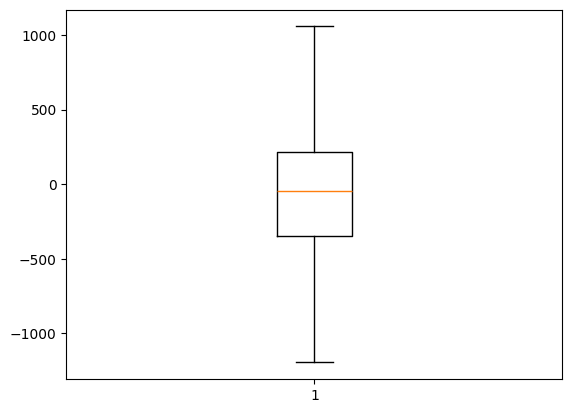

In [28]:
import matplotlib.pyplot as plt

if dates["correct"].notnull().any():
    filtered_dates = dates[dates["correct"] != "error"]
    plt.boxplot(filtered_dates["correct"], showfliers=False)

In [29]:
# Assuming you have a DataFrame called 'filtered_dates' with a column 'correct'
filtered_dates = filtered_dates[filtered_dates["correct"] >= -3000]
filtered_dates["bucket"] = pd.qcut(filtered_dates["correct"], q=100, duplicates="drop")
equal_buckets = filtered_dates.groupby("bucket").size().reset_index(name="count")

/tmp/ipykernel_425911/3093622834.py:4: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  equal_buckets = filtered_dates.groupby("bucket").size().reset_index(name="count")


In [30]:
filtered_dates

Production date     Reg number correct            bucket
0        1-1600 (?)    Am1994,09.1     800   (600.0, 1995.0]
1     200BC - 400AD       Am,S.818     100     (81.0, 100.0]
2     200BC - 400AD       Am,S.817     100     (81.0, 100.0]
3         400 - 800        Am.9685     600    (550.0, 600.0]
4    1000BC - 400AD   Am,S.758.a-c    -300  (-303.0, -300.0]
..              ...            ...     ...               ...
719       100BC-600  Am1954,05.196    -350  (-375.0, -350.0]
720       100BC-600  Am1954,05.669    -350  (-375.0, -350.0]
721       100BC-650  Am1954,05.194    -375  (-400.0, -375.0]
722  150BC-1600 (?)        Am.6877    -875  (-970.0, -800.0]
723       100BC-600   Am1982,Q.944    -350  (-375.0, -350.0]

[197667 rows x 4 columns]

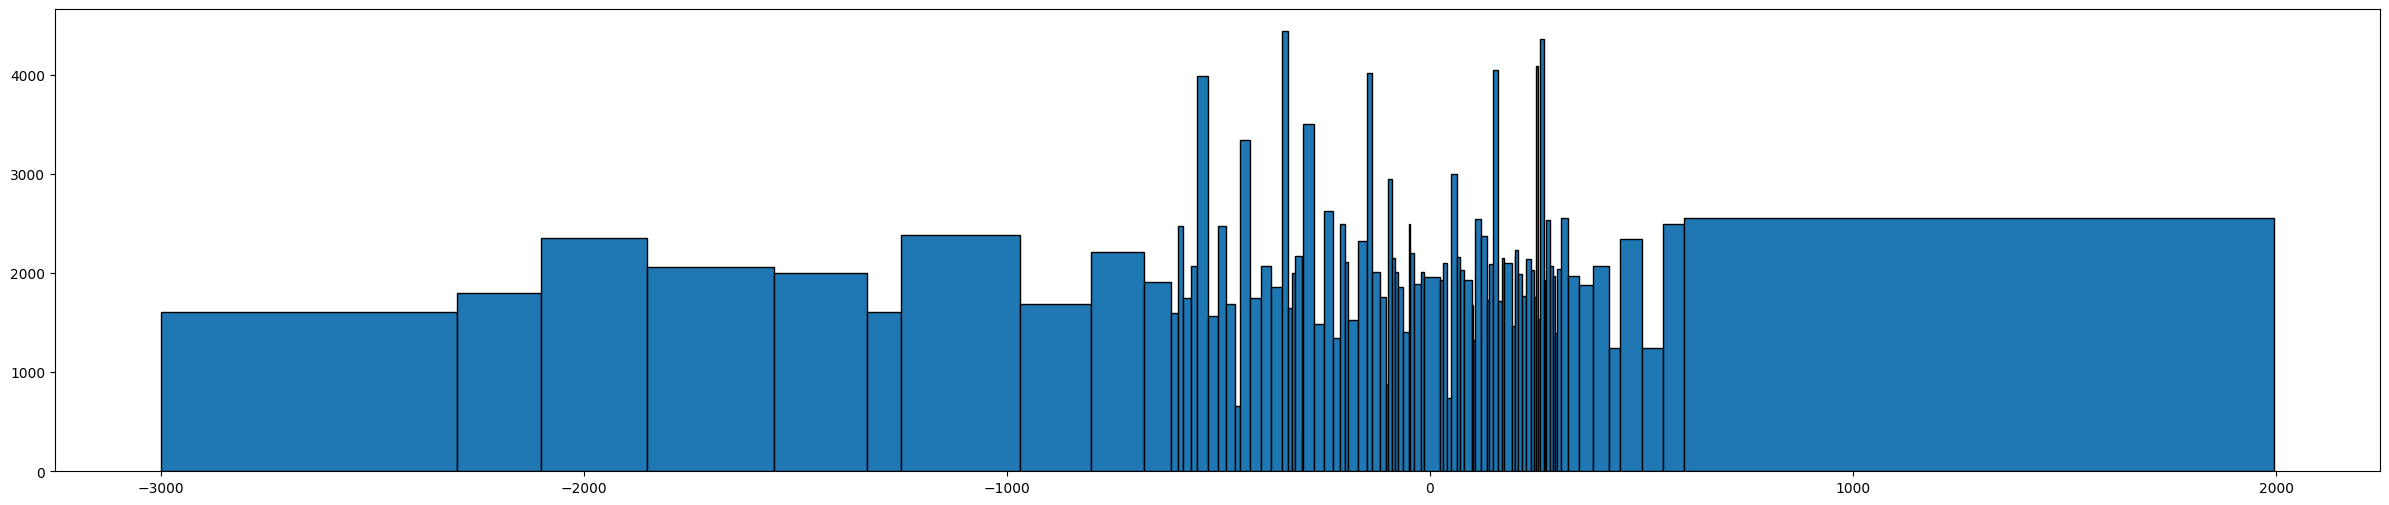

In [31]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(30, 6))  # Set the figure size to 10x6
bin_edges = [interval.left for interval in filtered_dates["bucket"].cat.categories] + [
    filtered_dates["bucket"].cat.categories[-1].right
]
plt.hist(filtered_dates["correct"], bins=bin_edges, edgecolor="black")
plt.show()

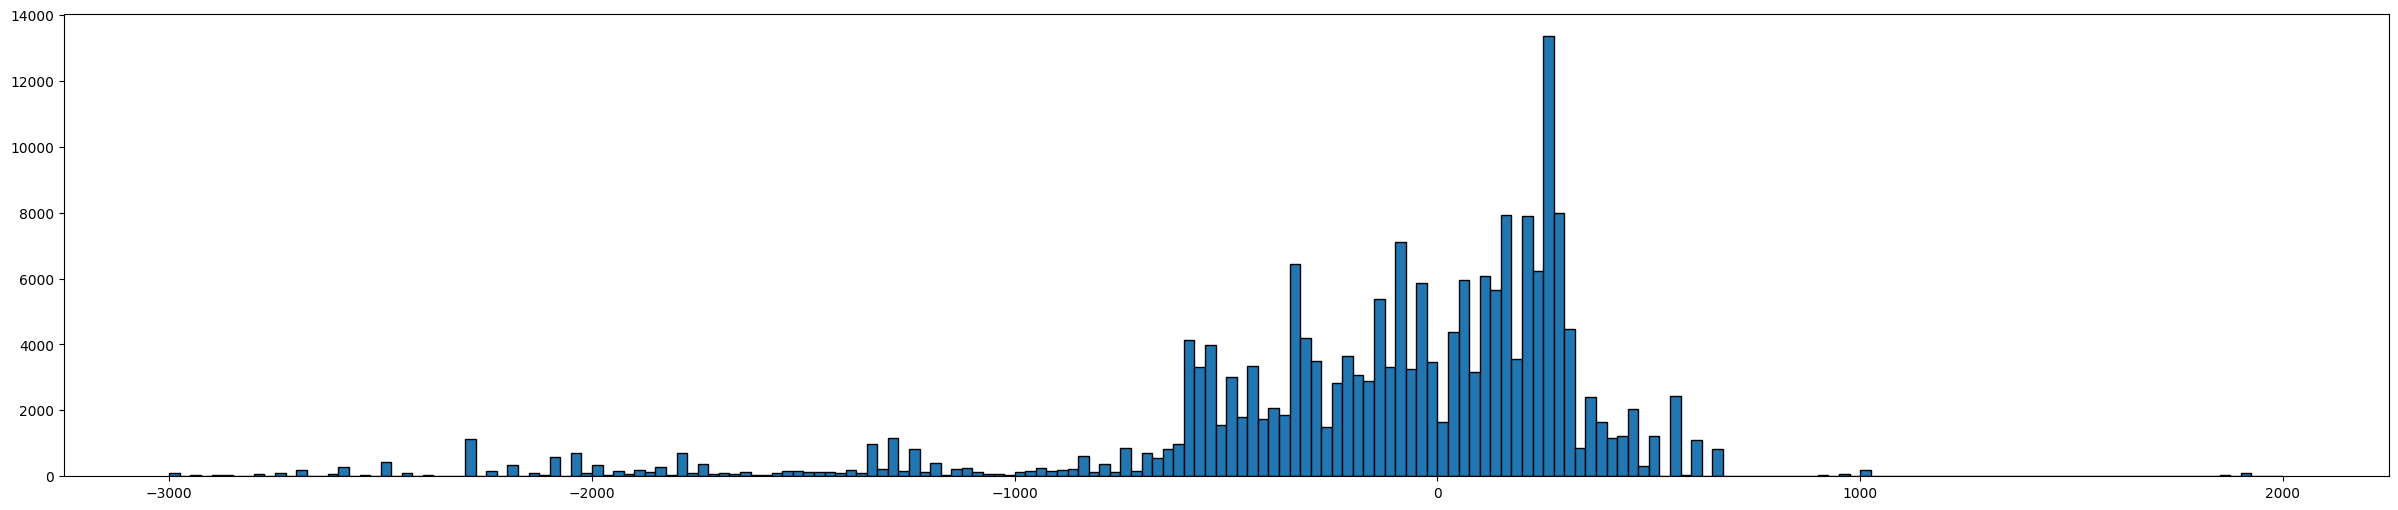

In [32]:
import numpy as np

fig, ax = plt.subplots(figsize=(30, 6))  # Set the figure size to 10x6
bin_edges = np.arange(filtered_dates["correct"].min(), filtered_dates["correct"].max() + 26, 25)
plt.hist(filtered_dates["correct"], bins=bin_edges, edgecolor="black")
plt.show()

In [33]:
from collections import Counter
from scipy.ndimage import convolve1d
from scipy.ndimage import gaussian_filter1d
from scipy.signal.windows import triang

In [34]:
def get_bin_idx(label, window=25):
    return int((label - (-3000)) // window)


def get_lds_kernel_window(kernel, ks, sigma):
    assert kernel in ["gaussian", "triang", "laplace"]
    half_ks = (ks - 1) // 2
    if kernel == "gaussian":
        base_kernel = [0.0] * half_ks + [1.0] + [0.0] * half_ks
        kernel_window = gaussian_filter1d(base_kernel, sigma=sigma) / max(
            gaussian_filter1d(base_kernel, sigma=sigma)
        )
    elif kernel == "triang":
        kernel_window = triang(ks)
    else:
        laplace = lambda x: np.exp(-abs(x) / sigma) / (2.0 * sigma)
        kernel_window = list(map(laplace, np.arange(-half_ks, half_ks + 1))) / max(
            map(laplace, np.arange(-half_ks, half_ks + 1))
        )

    return kernel_window

In [35]:
bin_index_per_label = [get_bin_idx(label) for label in filtered_dates["correct"]]

Nb = max(bin_index_per_label) + 1

num_samples_of_bins = dict(Counter(bin_index_per_label))
emp_label_dist = [num_samples_of_bins.get(i, 0) for i in range(Nb)]

# lds_kernel_window: [ks,], here for example, we use gaussian, ks=5, sigma=2
lds_kernel_window = get_lds_kernel_window(kernel="gaussian", ks=5, sigma=2)
# calculate effective label distribution: [Nb,]
eff_label_dist = convolve1d(np.array(emp_label_dist), weights=lds_kernel_window, mode="constant")

In [36]:
np.array(emp_label_dist)

array([  113,     0,    35,     0,    36,    28,     1,     1,    70,
           2,    87,     0,   193,     1,    16,    67,   287,     2,
          52,    10,   443,     7,    85,     2,    45,     4,    14,
           6,  1142,    20,   165,    13,   329,     1,   104,    27,
         597,    23,   697,    98,   355,    44,   145,    80,   186,
         136,   268,    52,   718,    99,   362,    79,   106,    58,
         142,    24,    49,   104,   154,   150,   124,   125,   119,
         107,   191,   113,   980,   214,  1154,   174,   827,   120,
         408,    46,   223,   249,   122,    76,    69,    53,   134,
         156,   252,   173,   198,   230,   627,   120,   373,   144,
         848,   148,   705,   554,   814,   975,  4148,  3313,  3990,
        1566,  3023,  1802,  3341,  1750,  2073,  1857,  6430,  4183,
        3506,  1492,  2834,  3644,  3081,  2890,  5376,  3308,  7121,
        3263,  5851,  3481,  1643,  4370,  5959,  3178,  6091,  5658,
        7929,  3568,

In [37]:
eff_label_dist

array([  143,   139,   162,    91,    93,    63,   119,    93,   148,
         151,   314,   267,   282,   256,   492,   356,   410,   388,
         689,   485,   576,   516,   512,   134,   135,    66,  1042,
        1119,  1320,  1272,  1458,   498,   573,   444,   925,   710,
        1331,  1354,  1628,  1150,  1211,   669,   726,   547,   744,
         678,  1221,  1186,  1401,  1232,  1237,   656,   668,   380,
         352,   343,   424,   445,   542,   609,   618,   575,   608,
         604,  1342,  1496,  2443,  2478,  3071,  2334,  2445,  1476,
        1466,   959,   956,   680,   680,   515,   410,   444,   607,
         715,   848,   929,  1333,  1261,  1448,  1386,  1888,  1528,
        2049,  2215,  2795,  2954,  6425,  8987, 12326, 13191, 14759,
       12589, 12500, 10667, 11074, 10011, 13870, 14991, 16931, 16455,
       16824, 14206, 13345, 12999, 16307, 16855, 19994, 20409, 22972,
       21359, 19751, 17120, 19205, 17275, 19736, 23182, 26368, 24708,
       28664, 28731,

In [38]:
# from loss import weighted_mse_loss

# Use re-weighting based on effective label distribution, sample-wise weights: [Ns,]
eff_num_per_label = [eff_label_dist[bin_idx] for bin_idx in bin_index_per_label]
weights = [np.float32(1 / x) for x in eff_num_per_label]

# calculate loss
# loss = weighted_mse_loss(preds, labels, weights=weights)

In [39]:
np.array(weights).shape

(197667,)

In [40]:
# preds, labels: [Ns,], "Ns" is the number of total samples
preds, labels = ..., ...
# assign each label to its corresponding bin (start from 0)
# with your defined get_bin_idx(), return bin_index_per_label: [Ns,]
bin_index_per_label = [get_bin_idx(label) for label in labels]

# calculate empirical (original) label distribution: [Nb,]
# "Nb" is the number of bins
Nb = max(bin_index_per_label) + 1
num_samples_of_bins = dict(Counter(bin_index_per_label))
emp_label_dist = [num_samples_of_bins.get(i, 0) for i in range(Nb)]

# lds_kernel_window: [ks,], here for example, we use gaussian, ks=5, sigma=2
lds_kernel_window = get_lds_kernel_window(kernel="gaussian", ks=5, sigma=2)
# calculate effective label distribution: [Nb,]
eff_label_dist = convolve1d(np.array(emp_label_dist), weights=lds_kernel_window, mode="constant")

TypeError: 'ellipsis' object is not iterable

In [41]:
import torch
import torch.nn.functional as F
import numpy as np
from scipy.ndimage import gaussian_filter1d
from scipy.signal.windows import triang
from scipy.ndimage import convolve1d


def get_lds_kernel_window(kernel, ks, sigma):
    assert kernel in ["gaussian", "triang", "laplace"]
    half_ks = (ks - 1) // 2

    if kernel == "gaussian":
        base_kernel = [0.0] * half_ks + [1.0] + [0.0] * half_ks
        kernel_window = gaussian_filter1d(base_kernel, sigma=sigma) / max(
            gaussian_filter1d(base_kernel, sigma=sigma)
        )
    elif kernel == "triang":
        kernel_window = triang(ks)
    else:
        laplace = lambda x: np.exp(-abs(x) / sigma) / (2.0 * sigma)
        kernel_window = list(map(laplace, np.arange(-half_ks, half_ks + 1))) / max(
            map(laplace, np.arange(-half_ks, half_ks + 1))
        )

    return kernel_window


def prepare_weights(labels, reweight, lds=True, lds_kernel="gaussian", lds_ks=5, lds_sigma=2):
    assert reweight in {"none", "inverse", "sqrt_inv"}
    assert (
        reweight != "none" if lds else True
    ), "Set reweight to 'sqrt_inv' (default) or 'inverse' when using LDS"

    value_dict = {
        x: 0 for x in list(set(labels))
    }  # initialize value dictionary with labels as keys
    for label in labels:
        value_dict[label] += 1  # increment counts of labels which occur multiple times
    if reweight == "sqrt_inv":
        value_dict = {k: np.sqrt(v) for k, v in value_dict.items()}
    elif reweight == "inverse":
        value_dict = {
            k: np.clip(v, 5, 1000) for k, v in value_dict.items()
        }  # clip weights for inverse re-weight
    num_per_label = [value_dict[label] for label in labels]
    if not len(num_per_label) or reweight == "none":
        return None
    print(f"Using re-weighting: [{reweight.upper()}]")

    if lds:
        lds_kernel_window = get_lds_kernel_window(lds_kernel, lds_ks, lds_sigma)
        print(f"Using LDS: [{lds_kernel.upper()}] ({lds_ks}/{lds_sigma})")
        # apply kernel to the reweighted values
        smoothed_value = convolve1d(
            np.asarray([v for _, v in value_dict.items()]),
            weights=lds_kernel_window,
            mode="constant",
        )
        value_dict_keys = list(value_dict.keys())
        num_per_label = [smoothed_value[value_dict_keys.index(label)] for label in labels]

    weights = [np.float32(1 / x) for x in num_per_label]
    scaling = len(weights) / np.sum(weights)
    weights = [scaling * x for x in weights]

    return torch.Tensor(weights)

In [42]:
prepare_weights(filtered_dates["correct"], "sqrt_inv")

Using re-weighting: [SQRT_INV]
Using LDS: [GAUSSIAN] (5/2)


tensor([3.7173, 0.5529, 0.5529,  ..., 1.0680, 3.0975, 0.5203])

In [43]:
weights = np.array(
    prepare_weights(filtered_dates["correct"], "sqrt_inv", lds_ks=1000, lds_sigma=1000)
)

Using re-weighting: [SQRT_INV]
Using LDS: [GAUSSIAN] (1000/1000)


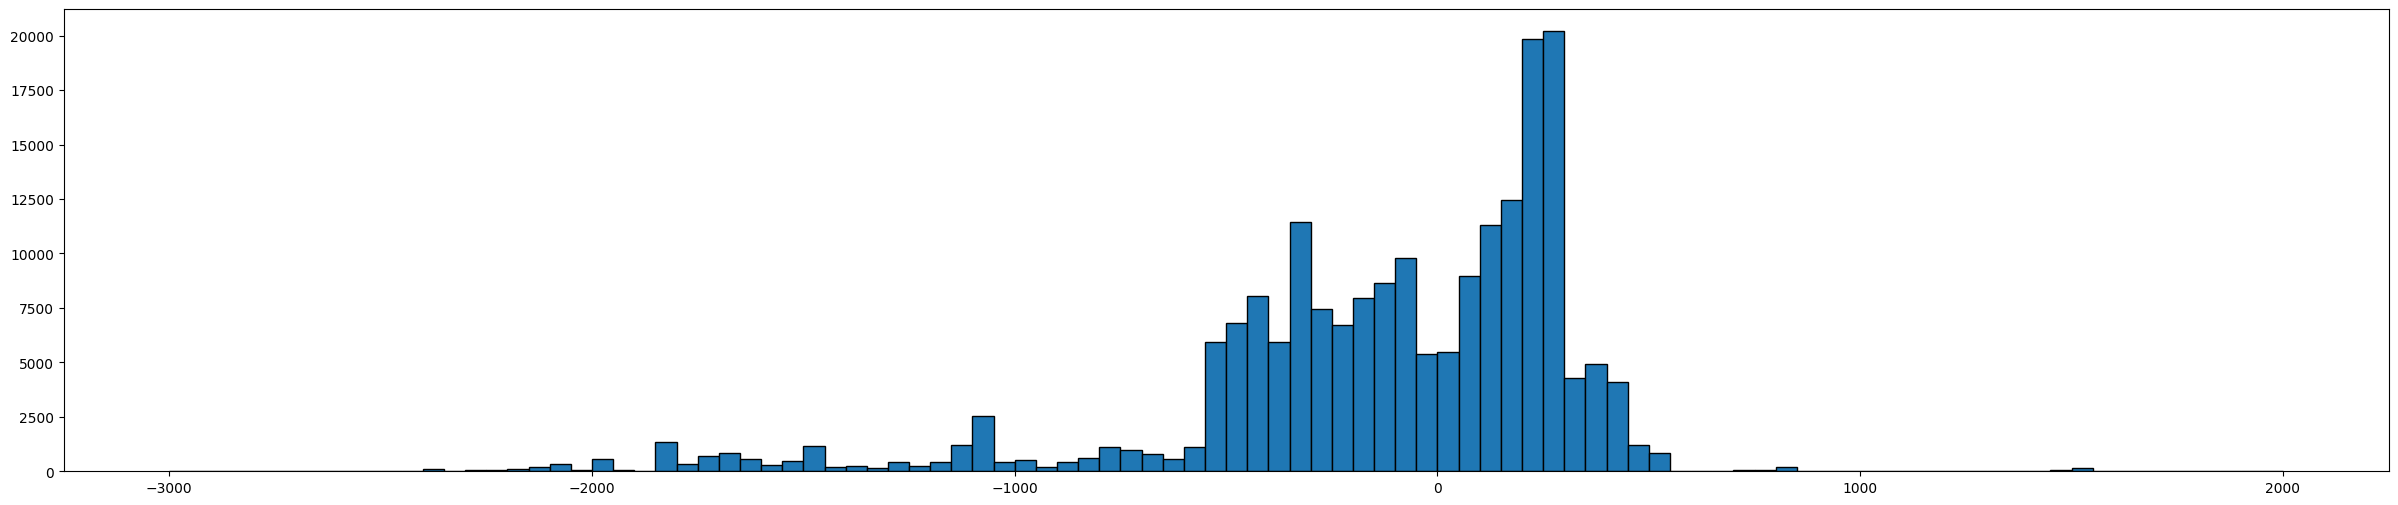

In [44]:
fig, ax = plt.subplots(figsize=(30, 6))  # Set the figure size to 10x6
bin_edges = np.arange(filtered_dates["correct"].min(), filtered_dates["correct"].max() + 51, 50)
plt.hist(filtered_dates["correct"] * weights, bins=bin_edges, edgecolor="black")
plt.show()

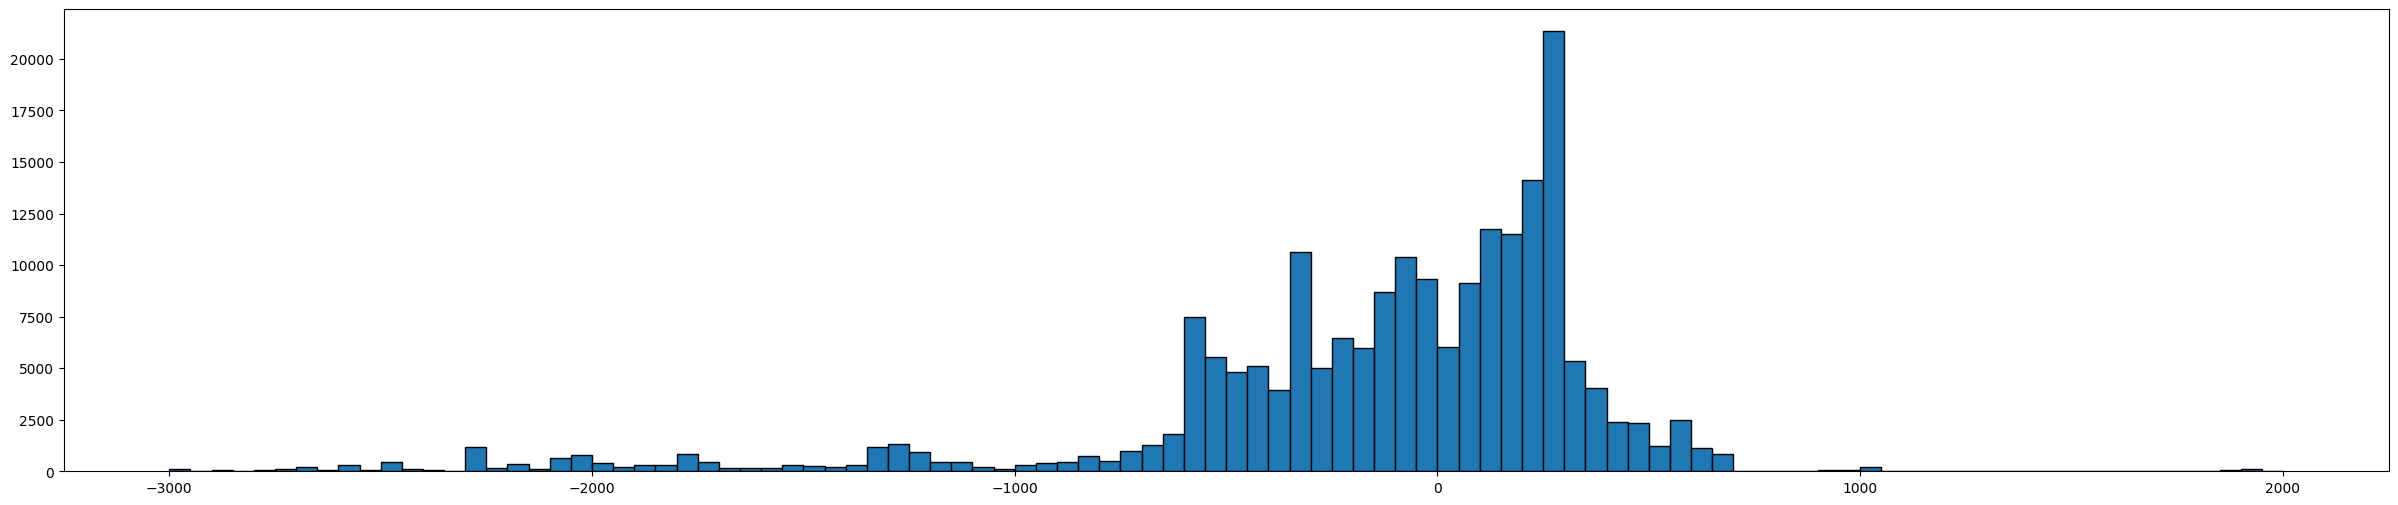

In [45]:
fig, ax = plt.subplots(figsize=(30, 6))  # Set the figure size to 10x6
bin_edges = np.arange(filtered_dates["correct"].min(), filtered_dates["correct"].max() + 51, 50)
plt.hist(filtered_dates["correct"], bins=bin_edges, edgecolor="black")
plt.show()

In [46]:
from scipy.ndimage import gaussian_filter1d
from scipy.signal.windows import triang
from scipy.ndimage import convolve1d


def get_lds_kernel_window(lds_kernel="gaussian", lds_ks=9, lds_sigma=1):
    r"""Function to determine the label distribution smoothing kernel window

    lds_kernel (str): LDS kernel type
    lds_ks (int): LDS kernel size (should be an odd number).
    lds_sigma (float): LDS gaussian/laplace kernel sigma
    """

    assert lds_kernel in ["gaussian", "triang", "laplace"]
    half_ks = (lds_ks - 1) // 2

    if lds_kernel == "gaussian":
        base_kernel = [0.0] * half_ks + [1.0] + [0.0] * half_ks
        kernel_window = gaussian_filter1d(base_kernel, sigma=lds_sigma) / max(
            gaussian_filter1d(base_kernel, sigma=lds_sigma)
        )
    elif lds_kernel == "triang":
        kernel_window = triang(lds_ks)
    else:

        def laplace(x):
            return np.exp(-abs(x) / lds_sigma) / (2.0 * lds_sigma)

        kernel_window = list(map(laplace, np.arange(-half_ks, half_ks + 1))) / max(
            map(laplace, np.arange(-half_ks, half_ks + 1))
        )

    return kernel_window


def prepare_LDS_weights(
    labels,
    n_bins=None,
    label_range=None,
    reweight="inv",
    lds_kernel="gaussian",
    lds_ks=9,
    lds_sigma=1,
    max_rel_weight=None,
    show_plot=True,
):

    assert reweight in {"inv", "sqrt_inv"}
    labels_shape = labels.shape
    if n_bins is None:
        labels = labels.astype(int)
        n_bins = np.max(labels) - np.min(labels)
    num_per_label, bin_edges = np.histogram(labels, bins=n_bins, range=label_range)
    new_labels = np.searchsorted(bin_edges, labels, side="left")
    new_labels[new_labels == 0] = 1
    if reweight == "sqrt_inv":
        num_per_label = np.sqrt(num_per_label)
    lds_kernel_window = get_lds_kernel_window(
        lds_kernel=lds_kernel, lds_ks=lds_ks, lds_sigma=lds_sigma
    )
    smoothed_value = convolve1d(num_per_label, weights=lds_kernel_window, mode="constant")
    if show_plot:
        plt.bar(
            bin_edges[:-1],
            num_per_label / num_per_label.sum(),
            width=(bin_edges[1] - bin_edges[0]),
            color="lime",
            edgecolor="black",
            label="original",
        )
        plt.plot(
            bin_edges[:-1], smoothed_value / smoothed_value.sum(), color="red", label="smoothed"
        )
        plt.title(f"Label distribution by bin (reweight={reweight})")
        plt.legend(loc="best")
        plt.show()
    num_per_label = smoothed_value[new_labels.flatten() - 1].reshape(*labels_shape)
    weights = 1 / num_per_label
    weights[num_per_label == 0] = 0
    if max_rel_weight is not None:
        weights = np.clip(weights, None, np.min(weights) * max_rel_weight)
    weights = weights / weights.sum() * len(labels)
    return torch.Tensor(weights)

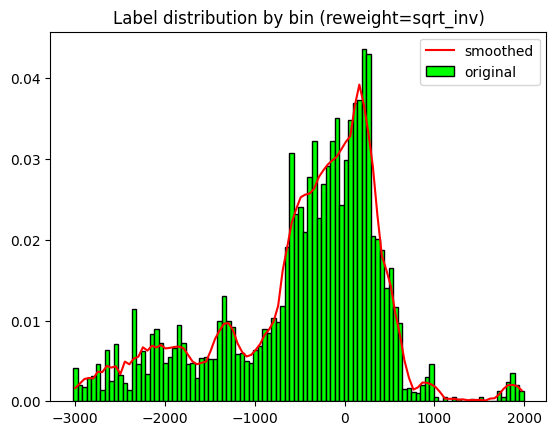

tensor([14.5464,  0.6404,  0.6404,  ...,  0.8173,  2.5599,  0.8173])

In [64]:
prepare_LDS_weights(
    filtered_dates["correct"],
    n_bins=100,
    label_range=(-3000, 2021),
    reweight="sqrt_inv",
    lds_ks=5,
    lds_sigma=2,
)

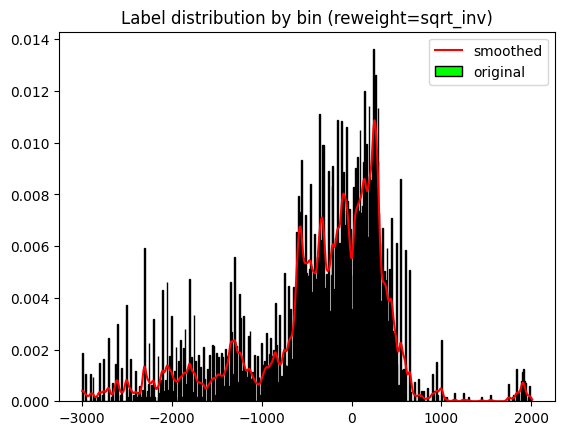

In [58]:
w = prepare_LDS_weights(
    filtered_dates["correct"],
    n_bins=500,
    label_range=(-3000, 2021),
    reweight="sqrt_inv",
    lds_ks=20,
    lds_sigma=2,
)

In [49]:
w

tensor([13.8139,  0.6039,  0.6039,  ...,  0.8029,  2.6979,  0.7797])

In [50]:
filtered_dates["correct"]

0       800
1       100
2       100
3       600
4      -300
       ... 
719    -350
720    -350
721    -375
722    -875
723    -350
Name: correct, Length: 197667, dtype: object

In [51]:
world_df

Image       Object type  \
0    https://media.britishmuseum.org/media/Reposito...              adze   
1    https://media.britishmuseum.org/media/Reposito...             altar   
2    https://media.britishmuseum.org/media/Reposito...             altar   
3    https://media.britishmuseum.org/media/Reposito...            amulet   
4    https://media.britishmuseum.org/media/Reposito...             arrow   
..                                                 ...               ...   
719  https://media.britishmuseum.org/media/Reposito...           whistle   
720  https://media.britishmuseum.org/media/Reposito...           whistle   
721  https://media.britishmuseum.org/media/Reposito...           whistle   
722  https://media.britishmuseum.org/media/Reposito...           whistle   
723  https://media.britishmuseum.org/media/Reposito...  whistling vessel   

                                           Description  \
0    Adze? of pecked and ground stone, grooved for ...   
1    Three fragments of burnt clay that formed part...   
2    Fragments of an altar or crematory basin made ...   
3    Chalchihuitl, amulet, pendant made of amazonst...   
4    Three expanding stem arrow or spear points, ma...   
..                                                 ...   
719  Anthropomorphic whistle / whistle in the shape...   
720  Whistle made of pottery, possibly modelled and...   
721  Anthropomorphic whistle in the shape of the An...   
722  Ovoid shaped whistle made of tumbaga by lost-w...   
723  Rectangular spouted jar with bridge and (broke...   

                    Culture Production date Production place  Materials  \
0                   Anasazi      1-1600 (?)              NaN      stone   
1    Middle Woodland Period   200BC - 400AD              NaN       clay   
2    Middle Woodland Period   200BC - 400AD              NaN       clay   
3              Classic Maya       400 - 800              NaN  amazonite   
4     Early Woodland Period  1000BC - 400AD              NaN      chert   
..                      ...             ...              ...        ...   
719                   Nasca       100BC-600              NaN    pottery   
720                   Nasca       100BC-600              NaN    pottery   
721                   Nasca       100BC-650              NaN    pottery   
722                    Zenu  150BC-1600 (?)              NaN    tumbaga   
723                   Nasca       100BC-600              NaN    pottery   

                                              Subjects     Reg number  \
0                                                  NaN    Am1994,09.1   
1                                                  NaN       Am,S.818   
2                                                  NaN       Am,S.817   
3                                                  NaN        Am.9685   
4                                                  NaN   Am,S.758.a-c   
..                                                 ...            ...   
719                                 society/human life  Am1954,05.196   
720                                             animal  Am1954,05.669   
721  society/human life; anthropomorphism; amphibia...  Am1954,05.194   
722                                                NaN        Am.6877   
723                                               bird   Am1982,Q.944   

            region  
0    north_america  
1    north_america  
2    north_america  
3    north_america  
4    north_america  
..             ...  
719  south_america  
720  south_america  
721  south_america  
722  south_america  
723  south_america  

[201119 rows x 10 columns]